### Solution 1


In [1]:
#importing the libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

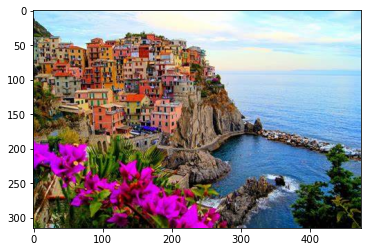

In [24]:
img = cv.imread('CinqueTerre.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

### a)

In [3]:
#Size and Number of channels of the image
print("The size of the image is:", img.shape)
print("Number of channels in the image is: ", img.shape[-1])

The size of the image is: (315, 474, 3)
Number of channels in the image is:  3


### b)

(50, 50, 3)


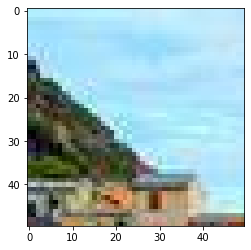

In [21]:
#getting the top left part of the image
subimg1 = img[:50,:50,:]
print(subimg1.shape)
plt.imshow(cv.cvtColor(subimg1, cv.COLOR_BGR2RGB))
plt.show()

(50, 50, 3)


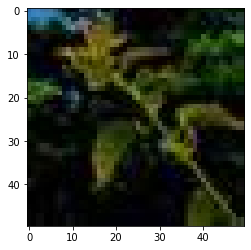

In [22]:
#getting the bottom right part of the image
subimg2 = img[265:,424:,:]
print(subimg2.shape)
plt.imshow(cv.cvtColor(subimg2, cv.COLOR_BGR2RGB))
plt.show()

In [25]:
#Funtion to calculate SSD
def ssd(img1, img2):
    diff = img1 - img2
    ssd = np.sum(diff**2, axis=(0,1)).sum()
    return ssd

In [27]:
#Calculating the ssd of the bottom right and top left part
SSD = ssd(subimg1,subimg2)
print("The SSD of the two images is : ", SSD)

The SSD of the two images is :  781484


### Solution 2

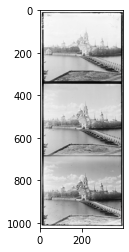

In [30]:
#reading the image as grayscale
img2 = cv.imread('monastery.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

In [31]:
#splitting the image into blue, green and red channels
w,h=img2.shape
height=int(w/3)
blue=img2[0:height]
green=img2[height:2*height]
red=img2[2*height:3*height]
size = img2.shape
print("The size of the image is :", size)

The size of the image is : (1024, 391)


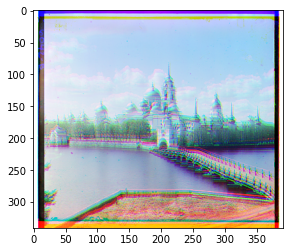

In [32]:
#image without alignment
merged = cv.merge([blue,green,red])
plt.imshow(cv.cvtColor(merged, cv.COLOR_BGR2RGB))
plt.show()

### a)

In [104]:
#function to crop the image in percent decimal
def crop(img,percent_dec=0.1):
    height, width = img.shape
    new_height, new_width = int(height/(1+percent_dec)), int(width/(1+percent_dec))
    return img[:new_height, :new_width]

In [105]:
#function to slide the window over the base image
def slide1(img1,img2,percent_dec=0.1):
    img1_sub = crop(img1,percent_dec)
    h,w = img1_sub.shape
    min_ssd = ssd(img1,img2)
    for i in range(10):
        for j in range(10):
            img2_sub = img2[i:i+h,j:j+w]
            ssd1 = ssd(img1_sub,img2_sub)
            if ssd1<min_ssd:
                min_ssd = ssd1
                best_img = [i,j]
    return(min_ssd,best_img)

### a)

In [110]:
#we shall fix the base image as green and slide red and blue over it with different window values
b_on_g = slide1(blue,green,0.2)
r_on_g = slide1(red,green,0.2)
g_fin = green
b_fin = np.roll(blue,(b_on_g[1][0],b_on_g[1][1]), axis =(0,1))
r_fin = np.roll(red,(r_on_g[1][0],r_on_g[1][1]), axis =(0,1))

### b)

In [111]:
print("Best SSD value and displacement vector for blue on green are",b_on_g)
print("Best SSD value and displacement vector for red on green are",r_on_g)

Best SSD value and displacement vector for blue on green are (8154748, [4, 0])
Best SSD value and displacement vector for red on green are (7692597, [6, 1])


### c)

In [112]:
#merging the best aligned channels
merged = cv.merge([b_fin,g_fin,r_fin])

### d)

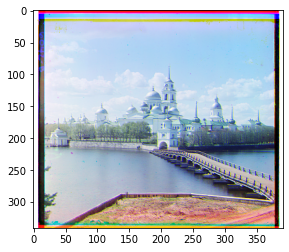

In [113]:
#displaying the merged image
plt.imshow(cv.cvtColor(merged, cv.COLOR_BGR2RGB))
plt.show()